# Chapter 5: The Beta Distribution

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom

## Examples

I've decided to work with the SciPy package, even though the book uses the R language.  Since I'm not familiar with the package, I've decided to work along with some of the eamples from the chapter so that I can make sure I get the same results.

### A Strange Scenario

Consider the following observations
* 14 wins
* 27 losses
* 41 total trials

Find the probability of those observations under each hypothesis:
* $H_1$: $P(w)=\frac{1}{2}$
* $H_2$: $P(w)=\frac{14}{41}$

To do this, find the following:

$$
P(D|H_1) = B\left({14; 41, \frac{1}{2}} \right)
$$

$$
P(D|H_2) = B\left({14; 41, \frac{14}{41}} \right)
$$

In [28]:
k=14
n = 41
p1 = 1/2
p2 = 14/41

h1 = binom.pmf(k, n, p1)
h2 = binom.pmf(k,n, p2)

print(f"P(D|H_1): {round(h1, 3)}")
print(f"P(D|H_2): {round(h2,3)}")

P(D|H_1): 0.016
P(D|H_2): 0.13


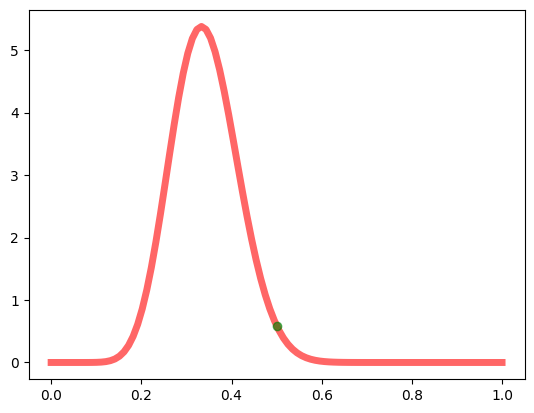

In [29]:
a=14
b=27

fig, ax = plt.subplots(1,1)

x = np.linspace(0, 1, 100)

ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label="beta pdf")
ax.plot(0.5, beta.pdf(.5, a,b), 'go', lw=5, alpha=0.6)
plt.show()

In [30]:
p_h1 = beta.cdf(1/2, a, b)
print(f"The probability that the rate of success is less than 1/2 is: {round(p_h1,3)}")

The probability that the rate of success is less than 1/2 is: 0.981


### Reverse-Engineering the Gatcha Game

* $\alpha = 5$
* $\beta = 1195$
* $p = 0.005$

In [31]:
a = 5
b = 1195
p = 0.005

print(round(beta.sf(p, a, b), 2))

0.29


## Exercises

1.  You want to use the beta distribution to determine whether or not a coin you have is a fair coin - meaning that the coin gives you heads and tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using the beta distribution, what is the probability that the coin will land on heads more than 60 percent of the time? 
2.  You flip the coin 10 more times and now have 9 heads and 11 tails total. What is the probability that the coin is fair, using our definition of fair, give or take 5 percent?
3.  Data is the best way to become more confident in your assertions. You flip the coin 200 more times and end up with 109 heads and 111 tails. Now what is the probability that the coin is fair, give or take 5 percent?

## Responses

### Exercise 1

> 1.  You want to use the beta distribution to determine whether or not a coin you have is a fair coin - meaning that the coin gives you heads and tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using the beta distribution, what is the probability that the coin will land on heads more than 60 percent of the time? 

In [32]:
a = 4
b = 6
p = 0.6

prob = beta.sf(p, a, b)
print(f"The probability that the coin lands on heads more than 60 percent of the time is: {round(prob, 3)}")

The probability that the coin lands on heads more than 60 percent of the time is: 0.099


### Exercise 2

> 2.  You flip the coin 10 more times and now have 9 heads and 11 tails total. What is the probability that the coin is fair, using our definition of fair, give or take 5 percent?

In [35]:
a = 9
b = 11
prop_upper = .55
prop_lower = .45

prob_upper = beta.sf(prop_upper, a, b)
prob_lower = beta.cdf(prop_lower, a, b)
prob_unfair = prob_upper + prob_lower
print(f"The probability that the coin is fair is: {1-prob_unfair:0.2}")

The probability that the coin is fair is: 0.31


### Exercise 3


> Data is the best way to become more confident in your assertions. You flip the coin 200 more times and end up with 109 heads and 111 tails. Now what is the probability that the coin is fair, give or take 5 percent?

In [36]:
a = 109
b = 111
prop_upper = 0.55
prop_lower = 0.45

prob_upper = beta.sf(prop_upper, a, b)
prob_lower = beta.cdf(prop_lower, a, b)
prob_unfair = prob_upper + prob_lower
print(f"The probability that the coin is fair is: {1-prob_unfair:0.2}")

The probability that the coin is fair is: 0.86
